In [3]:
from svmutil import *

/home/hari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Accuracy = 72% (72/100) (classification)
Accuracy = 42% (42/100) (classification)
Accuracy = 47% (47/100) (classification)
Accuracy = 63% (63/100) (classification)
Accuracy = 74% (74/100) (classification)
Accuracy = 70% (70/100) (classification)
Accuracy = 71% (71/100) (classification)
Accuracy = 75% (75/100) (classification)
Accuracy = 76% (76/100) (classification)
Accuracy = 71% (71/100) (classification)
Accuracy = 71% (71/100) (classification)
Accuracy = 71% (71/100) (classification)
Accuracy = 67% (67/100) (classification)
Accuracy = 63% (63/100) (classification)
Accuracy = 65% (65/100) (classification)
Accuracy = 60% (60/100) (classification)
Accuracy = 57% (57/100) (classification)
Accuracy = 55% (55/100) (classification)
Accuracy = 54% (54/100) (classification)
Accuracy = 51% (51/100) (classification)
Accuracy = 51% (51/100) (classification)
Accuracy = 51% (51/100) (classification)
Accuracy = 49% (49/100) (classification)
Accuracy = 50% (50/100) (classification)
Accuracy = 49% (

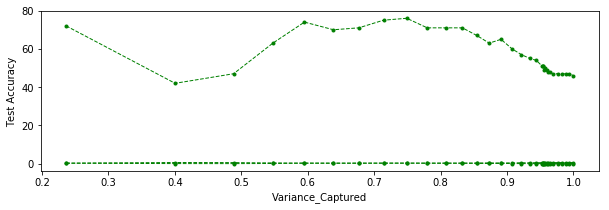

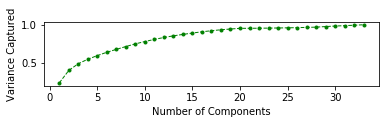

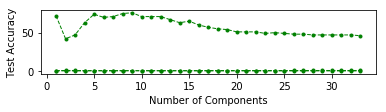

In [132]:
# Linear PCA
import numpy as np
from svmutil import *
import matplotlib.pyplot as plt
param = svm_parameter()
param.kernel_type = RBF
param.C = 10
import pandas
data = pandas.read_csv(r'ionosphere.data').as_matrix()
X_train=data[:100,:34]
X_test=data[100:200,:34]
Y_train=np.zeros(350)
for i in range(350):
    if data[i][34]=='b':
        Y_train[i]=int(0)
    else:
        Y_train[i]=int(1)
Y_test=Y_train[100:200]
Y_train=Y_train[:100]
X_test=np.delete(X_test,1,1)
X_train=np.delete(X_train,1,1)
#X_train=X_train/np.max(X_train,axis=0)
#X_test=X_test/np.max(X_train,axis=0)
mean=np.mean(X_train,axis=0)
X=X_train-mean
cov=np.dot(X.T,X)
cov=cov.astype(float)
values,vectors=np.linalg.eig(cov)
total_variance=np.sum(values)
accuracy=[]
variance_capture=[]
num_components=[]
for i in range(np.shape(X)[1]):
    vector_10=vectors[:i+1]
    num_components.append(i+1)
    X_final=np.dot(X,vector_10.T)
    prob = svm_problem(Y_train, X_final)
    m=svm_train(prob, param)
    X_tst=np.dot(X_test,vector_10.T)
    p_labels, p_acc, p_vals = svm_predict(Y_test,X_tst, m)
    accuracy.append(p_acc)
    variance_capture.append((np.sum(values[:i+1])/total_variance))
fig = plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.plot(variance_capture, accuracy,'go--', linewidth=1, markersize=3)
plt.xlabel('Variance_Captured')
plt.ylabel('Test Accuracy')
plt.show()

plt.subplot(3, 1, 2)
plt.plot(num_components, variance_capture ,color='green', marker='o', linestyle='dashed',linewidth=1, markersize=3)
plt.xlabel('Number of Components')
plt.ylabel('Variance Captured')
plt.show()


plt.subplot(3, 1, 3)
plt.plot(num_components, accuracy,color='green', marker='o', linestyle='dashed',linewidth=1, markersize=3)
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.show()


In [12]:
from prettytable import PrettyTable

In [136]:
table=PrettyTable(['Variance Capured','Test Accuracy'])

In [137]:
for x in range(33):
    table.add_row([variance_capture[x],accuracy[x]])

In [138]:
print(table)

+--------------------+-----------------------------------+
|  Variance Capured  |           Test Accuracy           |
+--------------------+-----------------------------------+
| 0.9999999999999974 | (75.0, 0.25, 0.31709791983764585) |
| 0.9999999999999977 | (82.0, 0.18, 0.41025641025641024) |
| 0.9999999999999978 | (81.0, 0.19, 0.38455382152861145) |
| 0.9999999999999982 |        (82.0, 0.18, 0.4096)       |
| 0.9999999999999986 |  (83.0, 0.17, 0.437173825772782)  |
| 0.9999999999999988 |         (83.0, 0.17, 0.44)        |
| 0.9999999999999989 | (84.0, 0.16, 0.46537842190016104) |
| 0.9999999999999991 | (84.0, 0.16, 0.46537842190016104) |
| 0.9999999999999992 |         (83.0, 0.17, 0.44)        |
| 0.9999999999999992 | (83.0, 0.17, 0.44430844553243576) |
| 0.9999999999999992 | (79.0, 0.21, 0.35350987810004203) |
| 0.9999999999999992 | (81.0, 0.19, 0.39208486332109344) |
| 0.9999999999999992 |  (80.0, 0.2, 0.3694581280788177)  |
| 0.9999999999999994 |  (77.0, 0.23, 0.3064312736443884)

/home/hari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


Accuracy = 75% (75/100) (classification)
Accuracy = 82% (82/100) (classification)
Accuracy = 81% (81/100) (classification)
Accuracy = 82% (82/100) (classification)
Accuracy = 83% (83/100) (classification)
Accuracy = 83% (83/100) (classification)
Accuracy = 84% (84/100) (classification)
Accuracy = 84% (84/100) (classification)
Accuracy = 83% (83/100) (classification)
Accuracy = 83% (83/100) (classification)
Accuracy = 79% (79/100) (classification)
Accuracy = 81% (81/100) (classification)
Accuracy = 80% (80/100) (classification)
Accuracy = 77% (77/100) (classification)
Accuracy = 77% (77/100) (classification)
Accuracy = 80% (80/100) (classification)
Accuracy = 80% (80/100) (classification)
Accuracy = 81% (81/100) (classification)
Accuracy = 79% (79/100) (classification)
Accuracy = 79% (79/100) (classification)
Accuracy = 79% (79/100) (classification)
Accuracy = 79% (79/100) (classification)
Accuracy = 79% (79/100) (classification)
Accuracy = 78% (78/100) (classification)
Accuracy = 79% (

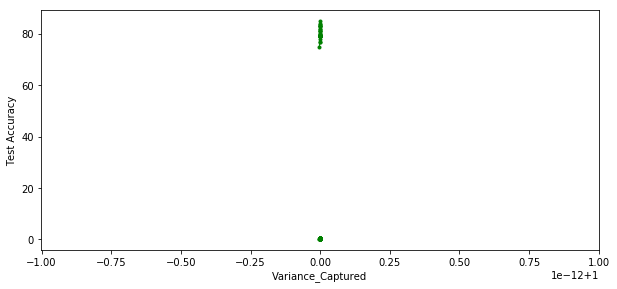

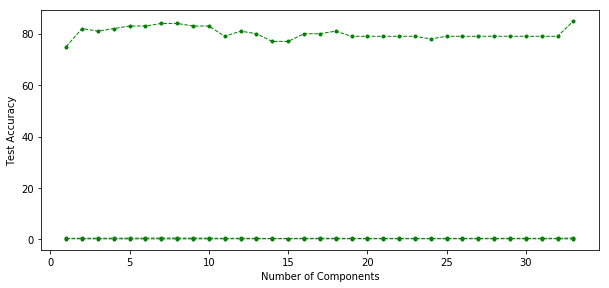

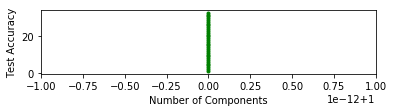

In [139]:
#LDA
import numpy as np
from svmutil import *
import matplotlib.pyplot as plt
from scipy.linalg import eigh
param = svm_parameter()
param.kernel_type = LINEAR
param.C = 10
import pandas
data = pandas.read_csv(r'ionosphere.data').as_matrix()
X_train=data[:100,:34]
X_test=data[100:200,:34]
Y_train=np.zeros(350)
for i in range(350):
    if data[i][34]=='b':
        Y_train[i]=int(0)
    else:
        Y_train[i]=int(1)
X_test=np.delete(X_test,1,1)
X_train=np.delete(X_train,1,1)
X_train=X_train/np.max(X_train,axis=0)
X_test=X_test/np.max(X_train,axis=0)
X_0=[]
X_1=[]
for i in range(100):
    if(Y_train[i]==0):
        X_0.append(X_train[i])
    else:
        X_1.append(X_train[i])
Y_test=Y_train[100:200]
Y_train=Y_train[:100]
mean=np.mean(X_train,axis=0)
mean_0=np.mean(X_0,axis=0,keepdims=True)
mean_1=np.mean(X_1,axis=0,keepdims=True)
variance_0=np.dot((X_0-mean_0).T,X_0-mean_0)
variance_1=np.dot((X_1-mean_1).T,X_1-mean_1)
withinclass=variance_0+variance_1
multiclass=(np.dot((mean_0-mean).T,mean_0-mean)+np.dot((mean_1-mean).T,mean_1-mean))*50
withinclass=(withinclass+withinclass.T)/2
multiclass=(multiclass+multiclass.T)/2
withinclass=withinclass.astype(float)
multiclass=multiclass.astype(float)
values, vectors = np.linalg.eig(np.linalg.inv(withinclass).dot(multiclass))
#values, vectors = eigh(multiclass, withinclass, eigvals_only=False)
values=np.real(values)
vectors=np.real(vectors)
accuracy=[]
variance_capture=[]
num_components=[]
value=[]
accuracy=[]
for i in values:
    value.append(abs(i))
values=value
total_variance=np.sum(values)
for i in range(np.shape(X_train)[1]):
    vector_10=vectors[:i+1]
    num_components.append(i+1)
    X_final=np.dot(X_train,vector_10.T)
    prob = svm_problem(Y_train, X_final)
    m=svm_train(prob, param)
    X_tst=np.dot(X_test,vector_10.T)
    p_labels, p_acc, p_vals = svm_predict(Y_test,X_tst, m)
    accuracy.append(p_acc)
    variance_capture.append((np.sum((values[:i+1]))/total_variance))
fig = plt.figure(figsize=(10,15))
plt.subplot(3, 1, 1)
print(variance_capture)
plt.plot(variance_capture, accuracy,'go--', linewidth=1, markersize=3)
plt.xlabel('Variance_Captured')
plt.ylabel('Test Accuracy')
plt.show()
fig = plt.figure(figsize=(10,15))
plt.subplot(3, 1, 2)
plt.plot(num_components, accuracy,color='green', marker='o', linestyle='dashed',linewidth=1, markersize=3)
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.show()
plt.subplot(3, 1, 3)
plt.plot(variance_capture,num_components ,color='green', marker='o', linestyle='dashed',linewidth=1, markersize=3)
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.show()


/home/hari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


Accuracy = 70% (70/100) (classification)
Accuracy = 73% (73/100) (classification)
Accuracy = 75% (75/100) (classification)
Accuracy = 75% (75/100) (classification)
Accuracy = 51% (51/100) (classification)
Accuracy = 79% (79/100) (classification)
Accuracy = 81% (81/100) (classification)
Accuracy = 84% (84/100) (classification)
Accuracy = 82% (82/100) (classification)
Accuracy = 82% (82/100) (classification)
Accuracy = 82% (82/100) (classification)
Accuracy = 82% (82/100) (classification)
Accuracy = 83% (83/100) (classification)
Accuracy = 83% (83/100) (classification)
Accuracy = 83% (83/100) (classification)
Accuracy = 83% (83/100) (classification)
Accuracy = 84% (84/100) (classification)
Accuracy = 83% (83/100) (classification)
Accuracy = 84% (84/100) (classification)
Accuracy = 84% (84/100) (classification)
Accuracy = 83% (83/100) (classification)
Accuracy = 84% (84/100) (classification)
Accuracy = 84% (84/100) (classification)
Accuracy = 58% (58/100) (classification)
Accuracy = 57% (

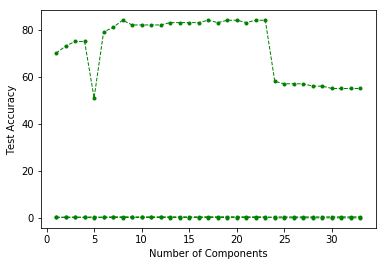

In [141]:
#kernel PCA
import numpy as np
from svmutil import *
import matplotlib.pyplot as plt
from scipy import exp
from scipy.spatial.distance import pdist, squareform
param = svm_parameter()
param.kernel_type = RBF
param.C = 10
import pandas
data = pandas.read_csv(r'ionosphere.data').as_matrix()
X_train=data[:100,:34]
X_test=data[100:200,:34]
Y_train=np.zeros(350)
for i in range(350):
    if data[i][34]=='b':
        Y_train[i]=int(0)
    else:
        Y_train[i]=int(1)
Y_test=Y_train[100:200]
Y_train=Y_train[:100]
X_test=np.delete(X_test,1,1)
X_train=np.delete(X_train,1,1)
X_train=X_train/np.max(X_train,axis=0)
X_test=X_test/np.max(X_train,axis=0)
sq_dists = pdist(X_train, 'sqeuclidean')
mat_sq_dists = squareform(sq_dists)
K = exp(-1 * mat_sq_dists)
N = K.shape[0]
one_n = np.ones((N,N)) / N
K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
eigvals, eigvecs = eigh(K)
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)
accuracy=[]
variance_capture=[]
num_components=[]
total=np.sum(eigvals)
for j in range(33):
    j=j+1
    num_components.append(j)
    alphas = np.column_stack((eigvecs[:,-i] for i in range(1,j+1)))
    lambdas = [eigvals[-i] for i in range(1,j+1)]
    variance_capture.append(np.sum(lambdas)/total)
    X_testf=[]
    for i in X_test:
        x=project_x(i,X_train,1,alphas,lambdas)
        X_testf.append(x)
    prob = svm_problem(Y_train, alphas)
    m=svm_train(prob, param)
    #p_labels, p_acc, p_vals = svm_predict(Y_train, alphas, m)
    p_labels, p_acc, p_vals = svm_predict(Y_test, X_testf, m)
    accuracy.append(p_acc)
plt.plot(num_components, accuracy,color='green', marker='o', linestyle='dashed',linewidth=1, markersize=3)
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.show()

/home/hari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Accuracy = 62% (62/100) (classification)
Accuracy = 59% (59/100) (classification)
Accuracy = 63% (63/100) (classification)
Accuracy = 64% (64/100) (classification)
Accuracy = 68% (68/100) (classification)
Accuracy = 52% (52/100) (classification)
Accuracy = 62% (62/100) (classification)
Accuracy = 65% (65/100) (classification)
Accuracy = 58% (58/100) (classification)
Accuracy = 65% (65/100) (classification)
Accuracy = 62% (62/100) (classification)
Accuracy = 64% (64/100) (classification)
Accuracy = 62% (62/100) (classification)
Accuracy = 61% (61/100) (classification)
Accuracy = 61% (61/100) (classification)
Accuracy = 56% (56/100) (classification)
Accuracy = 61% (61/100) (classification)
Accuracy = 53% (53/100) (classification)
Accuracy = 59% (59/100) (classification)
Accuracy = 65% (65/100) (classification)
Accuracy = 64% (64/100) (classification)
Accuracy = 61% (61/100) (classification)
Accuracy = 65% (65/100) (classification)
Accuracy = 63% (63/100) (classification)
Accuracy = 65% (

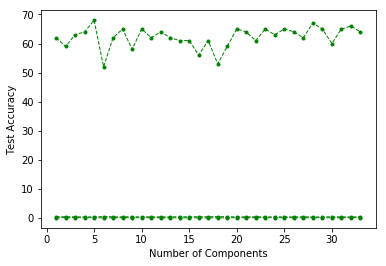

In [142]:
import numpy as np
from svmutil import *
import matplotlib.pyplot as plt
param = svm_parameter()
param.kernel_type = LINEAR
param.C = 10
import pandas
data = pandas.read_csv(r'ionosphere.data').as_matrix()
X_train=data[:100,:34]
X_test=data[100:200,:34]
Y_train=np.zeros(350)
for i in range(350):
    if data[i][34]=='b':
        Y_train[i]=int(0)
    else:
        Y_train[i]=int(1)
Y_test=Y_train[100:200]
Y_train=Y_train[:100]
X_test=np.delete(X_test,1,1)
X_train=np.delete(X_train,1,1)
X_train=X_train/np.max(X_train,axis=0)
X_test=X_test/np.max(X_train,axis=0)
accuracy=[]
variance_capture=[]
num_components=[]
for i in range(33):
    i=i+1
    num_components.append(i)
    w=.01*np.random.rand(i,33)
    delta_w=np.zeros((i,33))
    for x in X_train:
        v=np.dot(w,x.T)
        v=v.reshape(-1, 1)
        #print(np.sum(np.dot(v.T,w)))
        delta_w=np.dot(.11*v,(x-np.dot(v.T,w)))
        #print(np.sum(x-np.dot(v.T,w)))
        w=w-delta_w
    X_final=np.dot(X_train,w.T)
    prob = svm_problem(Y_train, X_final)
    m=svm_train(prob, param)
    X_testf=np.dot(X_test,w.T)
    p_labels, p_acc, p_vals = svm_predict(Y_test, X_testf, m)
    accuracy.append(p_acc)
plt.plot(num_components, accuracy,color='green', marker='o', linestyle='dashed',linewidth=1, markersize=3)
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.show()

In [5]:
from sklearn.decomposition import PCA, KernelPCA

In [341]:
param = svm_parameter(kernel_type = LINEAR, C = 10)

TypeError: __init__() got an unexpected keyword argument 'kernel_type'

In [59]:
param = svm_parameter()
param.kernel_type = LINEAR
param.C = 10


In [1]:
import pandas

/home/hari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [8]:
np.shape(data)

NameError: name 'np' is not defined

In [11]:
np.shape(data)

(350, 35)

In [123]:
X_train=data[:100,:34]

In [124]:
Y_train=np.zeros(350)
for i in range(350):
    if data[i][34]=='b':
        Y_train[i]=int(0)
    else:
        Y_train[i]=int(1)

In [125]:
Y_test=Y_train[100:200]

In [126]:
Y_train=Y_train[:100]

In [349]:
mean=np.mean(X_train,axis=0)

In [217]:
X=X_train-mean

In [218]:
cov=np.dot(X.T,X)

In [219]:
cov=cov.astype(float)

In [220]:
values,vectors=np.linalg.eig(cov)

In [221]:
np.shape(vectors)

(34, 34)

In [222]:
values

array([275.36146891, 190.9073673 , 102.51736056,  68.81861899,
        55.37101878,  50.84426967,  44.3561311 ,  43.37819855,
        40.71459031,  35.92137716,  32.3909669 ,  29.29490026,
        25.18125064,  21.77830093,  20.72853548,  19.28333198,
        16.35007211,  14.73077512,  11.45462986,  10.15795287,
         0.84410292,   1.18896535,   1.65091977,   2.01834977,
         2.38470348,   2.77344288,   3.42232159,   4.33682204,
         8.73876351,   7.92671396,   5.9912976 ,   6.42676012,
         7.2376076 ,   0.        ])

In [223]:
vector_10=vectors[:20]

In [224]:
X_final=np.dot(X,vector_10.T)

In [225]:
np.shape(X_final)

(100, 20)

In [226]:
prob = svm_problem(Y_train, X_final)

In [227]:
m=svm_train(prob, param)

In [27]:
m

In [10]:
X_test=data[100:200,:34]

In [229]:
X_test=np.dot(X_test,vector_10.T)

In [273]:
X_test=np.delete(X_test,1,1)

In [274]:
X_train=X_test/np.max(X_test,axis=0)

In [275]:
np.shape(X_test)

(100, 33)

In [39]:
m.svm_predict(X_test[0])

AttributeError: 'svm_model' object has no attribute 'svm_predict'

In [230]:
p_labels, p_acc, p_vals = svm_predict(Y_train, X_final, m)

Accuracy = 92% (92/100) (classification)


In [231]:
p_labels, p_acc, p_vals = svm_predict(Y_test,X_test, m)

Accuracy = 63% (63/100) (classification)


In [31]:
np.bincount(Y_train)

array([50, 50])

In [30]:
Y_train=Y_train.astype(int)

In [400]:
X_train=X_train/np.max(X_train,axis=0)

ZeroDivisionError: division by zero

In [352]:
X_train=np.delete(X_train,1,1)

In [98]:
X_train[:,1]

array([1.0, 1.0, 1.0, 1.0, 0.02337, 0.97588, 0.0, 0.96355, -0.01864, 1.0,
       1.0, 1.0, 1.0, 1.0, 0.50932, 0.99645, 0.0, 0.67065, 1.0, 1.0, 1.0,
       0.9607100000000001, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0,
       0.88208, 0.71253, 1.0, 0.66161, 1.0, 1.0, 0.91241, 1.0, 1.0, -1.0,
       0.9093200000000001, -0.64286, 0.99025, 0.0, 1.0,
       0.9459799999999999, 0.9816600000000001, 0.0, 0.84134, 1.0, 1.0,
       -0.67935, 0.9565899999999999, 0.08333, 1.0, -1.0, 1.0, 0.17188,
       1.0, 0.016669999999999997, 1.0, 0.6381600000000001, 1.0, 0.84783,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9608700000000001, 0.69444, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9227700000000001, 0.68198,
       0.74852, 0.39179, 0.67547, 0.72727, 0.5764699999999999,
       0.41931999999999997, 0.88305, 0.84557, 0.7087, -0.5418, 0.29202,
       0.79157, 0.9011600000000001, 0.97714, -1.0, 0.7408399999999999,
       1.0], dtype=object)

In [354]:
X_0=[]
X_1=[]
for i in range(100):
    if(Y_train[i]==0):
        X_0.append(X_train[i])
    else:
        X_1.append(X_train[i])

In [355]:
np.shape(X_0)

(50, 33)

In [356]:
mean=np.mean(X_train,axis=0)

In [357]:
mean_0=np.mean(X_0,axis=0,keepdims=True)
mean_1=np.mean(X_1,axis=0,keepdims=True)

In [358]:
mean_0=np.asarray(mean_0)
mean_1=np.asarray(mean_1)

In [359]:
multiclass=np.dot((mean_0-mean_1).T,(mean_0-mean_1))

In [360]:
np.shape(multiclass)

(33, 33)

In [361]:
X_0=X_0-mean_0
X_1=X_1-mean_1

In [204]:
variance_0=np.dot(X_0.T,X_0)

In [205]:
np.shape(variance_0)

(33, 33)

In [206]:
variance_1=np.dot(X_1.T,X_1)

In [207]:
withinclass=variance_0+variance_1

In [209]:
cov=np.dot(np.linalg.inv(withinclass),multiclass)

In [191]:
withinclass=np.asarray(withinclass)

In [117]:
np.shape(cov)

(33, 33)

In [ ]:
cov=np.dot()

In [154]:
np.shape(withinclass)

(33, 33)

In [208]:
withinclass=multiclass.astype(float)

In [178]:
np.shape(cov)

(33, 33)

In [189]:
values,vectors=np.linalg.eig(cov)

In [188]:
cov=cov.astype(float)

In [182]:
vector_10=vectors[:20]

In [183]:
X_final=np.dot(X_train,vector_10.T)

In [210]:
cov

array([[-101.0, -155.0, -49.0, ..., 14.875, -63.0, 0.8671875],
       [-50.0, -77.5, -25.5, ..., 7.375, -31.5, 0.40234375],
       [190.0, 272.0, 88.0, ..., -27.5, 113.0, -1.515625],
       ...,
       [-40.0, -57.5, -22.25, ..., 7.9375, -38.0, 0.53515625],
       [-2.0, -10.0, 2.0, ..., 1.5, -8.0, 0.03125],
       [896.0, 128.0, 64.0, ..., -128.0, 320.0, 4.5]], dtype=object)

In [211]:
values

array([-32.23188028+25.69815298j, -32.23188028-25.69815298j,
        29.97979732+14.41859986j,  29.97979732-14.41859986j,
       -25.15833641 +0.j        , -12.07820209+10.84466472j,
       -12.07820209-10.84466472j,  14.16275726 +0.j        ,
         8.81957089+10.03785824j,   8.81957089-10.03785824j,
        -1.79372426+13.42044728j,  -1.79372426-13.42044728j,
         3.0409523 +10.28593951j,   3.0409523 -10.28593951j,
        -0.05068451 +8.32205484j,  -0.05068451 -8.32205484j,
        -2.69114787 +7.65960684j,  -2.69114787 -7.65960684j,
        -7.71702423 +0.j        ,  -6.04937587 +2.84620731j,
        -6.04937587 -2.84620731j,   8.57398202 +0.2889264j ,
         8.57398202 -0.2889264j ,   1.82715773 +5.11193715j,
         1.82715773 -5.11193715j,  -2.47219075 +0.j        ,
        -0.0579639  +3.39305368j,  -0.0579639  -3.39305368j,
         3.99647651 +2.92428338j,   3.99647651 -2.92428338j,
         0.38497075 +0.j        ,   2.52120371 +0.98238576j,
         2.52120371 -0.9

In [185]:
np.shape(X_final)

(100, 20)

In [133]:
X_=X_final.astype(float)

TypeError: can't convert complex to float

In [362]:
variance_0=np.dot((X_0-mean_0).T,X_0-mean_0)

In [363]:
variance_1=np.dot((X_1-mean_1).T,X_1-mean_1)

In [364]:
withinclass=variance_0+variance_1

In [365]:
np.shape(withinclass)

(33, 33)

In [366]:
mean=np.mean(X_train,axis=0)

In [367]:
multiclass=np.dot((mean_0-mean).T,mean_0-mean)+np.dot((mean_1-mean).T,mean_1-mean)

In [368]:
multiclass=multiclass*50

In [372]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(withinclass).dot(multiclass))

In [370]:
withinclass=withinclass.astype(float)

In [371]:
multiclass=multiclass.astype(float)

In [373]:
eig_vals=np.real(eig_vals)

In [374]:
eig_vecs=np.real(eig_vecs)

In [375]:
np.shape(eig_vals)

(33,)

In [376]:
eig_vals

array([ 6.29193625e-01,  9.11358960e-16, -5.42134349e-16, -5.42134349e-16,
       -5.44676661e-16, -3.18531412e-16, -3.18531412e-16, -1.35064204e-16,
       -1.35064204e-16,  2.07096240e-16,  2.07096240e-16, -3.79693169e-17,
       -3.79693169e-17, -2.87236251e-17, -2.87236251e-17,  4.56849963e-17,
        4.56849963e-17, -8.23902612e-17, -4.07513804e-17, -4.07513804e-17,
        7.24963967e-17,  4.76439395e-17,  4.17111196e-17, -1.48646221e-17,
       -1.48646221e-17, -3.06132841e-17,  1.85886103e-17,  1.85886103e-17,
        5.41566348e-18,  5.41566348e-18, -7.01228548e-18,  2.27340593e-18,
        2.27340593e-18])

In [387]:
vector_10=eig_vecs[:15]

In [388]:
X_final=np.dot(X_train,vector_10.T)

In [127]:
X_test=data[100:200,:34]

In [129]:
X_train=np.delete(X_train,1,1)

In [391]:
X_test=X_test/np.max(X_test,axis=0)

In [392]:
X_test=np.dot(X_test,vector_10.T)

In [393]:
prob = svm_problem(Y_train, X_final)

In [394]:
m=svm_train(prob, param)

In [395]:
p_labels, p_acc, p_vals = svm_predict(Y_train, X_final, m)

Accuracy = 88% (88/100) (classification)


In [396]:
p_labels, p_acc, p_vals = svm_predict(Y_test, X_test, m)

Accuracy = 84% (84/100) (classification)


/home/hari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


Accuracy = 75% (75/100) (classification)
Accuracy = 82% (82/100) (classification)
Accuracy = 81% (81/100) (classification)
Accuracy = 82% (82/100) (classification)
Accuracy = 83% (83/100) (classification)
Accuracy = 83% (83/100) (classification)
Accuracy = 84% (84/100) (classification)
Accuracy = 84% (84/100) (classification)
Accuracy = 83% (83/100) (classification)
Accuracy = 83% (83/100) (classification)
Accuracy = 79% (79/100) (classification)
Accuracy = 81% (81/100) (classification)
Accuracy = 80% (80/100) (classification)
Accuracy = 77% (77/100) (classification)
Accuracy = 77% (77/100) (classification)
Accuracy = 80% (80/100) (classification)
Accuracy = 80% (80/100) (classification)
Accuracy = 81% (81/100) (classification)
Accuracy = 79% (79/100) (classification)
Accuracy = 79% (79/100) (classification)
Accuracy = 79% (79/100) (classification)
Accuracy = 79% (79/100) (classification)
Accuracy = 79% (79/100) (classification)
Accuracy = 78% (78/100) (classification)
Accuracy = 79% (

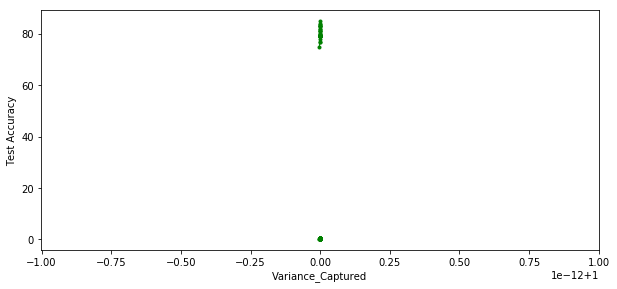

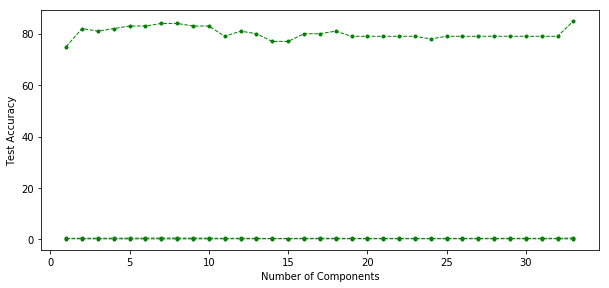

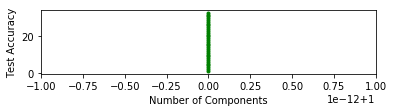

In [135]:
#LDA
import numpy as np
from svmutil import *
import matplotlib.pyplot as plt
from scipy.linalg import eigh
param = svm_parameter()
param.kernel_type = LINEAR
param.C = 10
import pandas
data = pandas.read_csv(r'ionosphere.data').as_matrix()
X_train=data[:100,:34]
X_test=data[100:200,:34]
Y_train=np.zeros(350)
for i in range(350):
    if data[i][34]=='b':
        Y_train[i]=int(0)
    else:
        Y_train[i]=int(1)
X_test=np.delete(X_test,1,1)
X_train=np.delete(X_train,1,1)
X_train=X_train/np.max(X_train,axis=0)
X_test=X_test/np.max(X_train,axis=0)
X_0=[]
X_1=[]
for i in range(100):
    if(Y_train[i]==0):
        X_0.append(X_train[i])
    else:
        X_1.append(X_train[i])
Y_test=Y_train[100:200]
Y_train=Y_train[:100]
mean=np.mean(X_train,axis=0)
mean_0=np.mean(X_0,axis=0,keepdims=True)
mean_1=np.mean(X_1,axis=0,keepdims=True)
variance_0=np.dot((X_0-mean_0).T,X_0-mean_0)
variance_1=np.dot((X_1-mean_1).T,X_1-mean_1)
withinclass=variance_0+variance_1
multiclass=(np.dot((mean_0-mean).T,mean_0-mean)+np.dot((mean_1-mean).T,mean_1-mean))*50
withinclass=(withinclass+withinclass.T)/2
multiclass=(multiclass+multiclass.T)/2
withinclass=withinclass.astype(float)
multiclass=multiclass.astype(float)
values, vectors = np.linalg.eig(np.linalg.inv(withinclass).dot(multiclass))
#values, vectors = eigh(multiclass, withinclass, eigvals_only=False)
values=np.real(values)
vectors=np.real(vectors)
accuracy=[]
variance_capture=[]
num_components=[]
value=[]
accuracy=[]
for i in values:
    value.append(abs(i))
values=value
total_variance=np.sum(values)
for i in range(np.shape(X_train)[1]):
    vector_10=vectors[:i+1]
    num_components.append(i+1)
    X_final=np.dot(X_train,vector_10.T)
    prob = svm_problem(Y_train, X_final)
    m=svm_train(prob, param)
    X_tst=np.dot(X_test,vector_10.T)
    p_labels, p_acc, p_vals = svm_predict(Y_test,X_tst, m)
    accuracy.append(p_acc)
    variance_capture.append((np.sum((values[:i+1]))/total_variance))
fig = plt.figure(figsize=(10,15))
plt.subplot(3, 1, 1)
print(variance_capture)
plt.plot(variance_capture, accuracy,'go--', linewidth=1, markersize=3)
plt.xlabel('Variance_Captured')
plt.ylabel('Test Accuracy')
plt.show()
fig = plt.figure(figsize=(10,15))
plt.subplot(3, 1, 2)
plt.plot(num_components, accuracy,color='green', marker='o', linestyle='dashed',linewidth=1, markersize=3)
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.show()
plt.subplot(3, 1, 3)
plt.plot(variance_capture,num_components ,color='green', marker='o', linestyle='dashed',linewidth=1, markersize=3)
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.show()


In [40]:
np.shape(vectors)

(33, 33)

In [45]:
a=abs(a[0][1])

In [49]:
print(variance_capture)

[0.9999999999999974, 0.9999999999999977, 0.9999999999999978, 0.9999999999999982, 0.9999999999999986, 0.9999999999999988, 0.9999999999999989, 0.9999999999999991, 0.9999999999999992, 0.9999999999999992, 0.9999999999999992, 0.9999999999999992, 0.9999999999999992, 0.9999999999999994, 0.9999999999999994, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [131]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np


In [272]:
sq_dists = pdist(X_train, 'sqeuclidean')

In [273]:
np.shape(sq_dists)

(4950,)

In [274]:
mat_sq_dists = squareform(sq_dists)

In [275]:
np.shape(mat_sq_dists)

(100, 100)

In [276]:
K = exp(-.1 * mat_sq_dists)

In [277]:
N = K.shape[0]
one_n = np.ones((N,N)) / N
K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

In [278]:
eigvals, eigvecs = eigh(K)

In [221]:
np.shape(eigvecs)

(100, 100)

In [279]:
#X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,3+1)))
alphas = np.column_stack((eigvecs[:,-i] for i in range(1,20+1)))
lambdas = [eigvals[-i] for i in range(1,20+1)]

In [314]:
np.shape(eigvals)

(100,)

In [315]:
eigvals

array([2.75248054e-16, 3.66688222e-02, 3.84903828e-02, 4.32675507e-02,
       5.39821664e-02, 6.55942661e-02, 1.26615165e-01, 1.45710890e-01,
       1.57155874e-01, 1.91920027e-01, 2.25785462e-01, 2.44838234e-01,
       2.53408920e-01, 3.05702375e-01, 3.41037528e-01, 3.74354025e-01,
       3.75322137e-01, 4.12834621e-01, 5.16786829e-01, 5.56488622e-01,
       5.66543221e-01, 5.78241012e-01, 6.29606339e-01, 6.78271881e-01,
       6.86514998e-01, 7.38108277e-01, 7.88981307e-01, 7.94828961e-01,
       8.62305298e-01, 8.70055343e-01, 9.11048798e-01, 9.37851829e-01,
       9.43045284e-01, 9.67925309e-01, 9.77876116e-01, 9.84542608e-01,
       9.89200262e-01, 9.93240064e-01, 9.94987066e-01, 9.98086616e-01,
       9.98322605e-01, 9.99212016e-01, 9.99540228e-01, 9.99753607e-01,
       9.99772579e-01, 9.99918946e-01, 9.99956270e-01, 9.99968776e-01,
       9.99999246e-01, 9.99999261e-01, 9.99999950e-01, 9.99999958e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

In [52]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    print(np.shape(k))
    return k.dot(alphas / lambdas)

In [292]:
X_train[1]

array([1.0, 1.0, -0.03365, 1.0, 0.00485, 1.0, -0.12062, 0.88965, 0.01198,
       0.73082, 0.05346, 0.8544299999999999, 0.00827, 0.54591, 0.00299,
       0.83775, -0.13644, 0.75535, -0.0854, 0.70887, -0.27502, 0.43385,
       -0.12062, 0.57528, -0.4022, 0.5898399999999999, -0.22145, 0.431,
       -0.17365, 0.60436, -0.2418, 0.56045, -0.38238], dtype=object)

In [286]:
x=X_train[1]

In [293]:
alphas[1]

array([-0.13913575, -0.05039544, -0.08296937, -0.00197031,  0.00389773,
        0.01828109,  0.05131049, -0.00395552, -0.05378076,  0.04991326,
       -0.01773489, -0.00169939, -0.0500573 , -0.02516995, -0.02760356,
        0.0435763 , -0.00232928,  0.01593916,  0.0099109 , -0.00430855])

In [313]:
 x=project_x(i,X_train,.1,alphas,lambdas)

(100,)


In [295]:
x

array([-0.05486556,  0.02804319, -0.06315823,  0.04126247, -0.01344332,
       -0.0066336 ,  0.0228484 , -0.03453829,  0.00679815, -0.01750819,
       -0.03738976, -0.03482684, -0.01178997,  0.05940254,  0.01789955,
       -0.03898955,  0.0064033 ,  0.01504933, -0.00840714,  0.01888284])

In [260]:
X_testf=[]
for i in X_test:
    x=project_x(i,X_train,.1,alphas,lambdas)
    X_testf.append(x)

In [261]:
np.shape(X_testf)

(100, 20)

In [262]:
prob = svm_problem(Y_train, alphas)

In [263]:
m=svm_train(prob, param)

In [264]:
p_labels, p_acc, p_vals = svm_predict(Y_train, alphas, m)

Accuracy = 93% (93/100) (classification)


In [265]:
p_labels, p_acc, p_vals = svm_predict(Y_test, X_testf, m)

Accuracy = 62% (62/100) (classification)


In [304]:
import numpy as np
from svmutil import *
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
param = svm_parameter()
param.kernel_type = RBF
param.C = 10
import pandas
data = pandas.read_csv(r'ionosphere.data').as_matrix()
X_train=data[:100,:34]
X_test=data[100:200,:34]
Y_train=np.zeros(350)
for i in range(350):
    if data[i][34]=='b':
        Y_train[i]=int(0)
    else:
        Y_train[i]=int(1)
Y_test=Y_train[100:200]
Y_train=Y_train[:100]
X_test=np.delete(X_test,1,1)
X_train=np.delete(X_train,1,1)
X_train=X_train/np.max(X_train,axis=0)
X_test=X_test/np.max(X_train,axis=0)
X_train=X_train-np.mean(X_train,axis=0)
X_test=X_test-np.mean(X_test,axis=0)
scikit_kpca = KernelPCA(n_components=3, kernel='rbf', gamma=.1)
X_train = scikit_kpca.fit_transform(X_train)
X_test = scikit_kpca.fit_transform(X_test)
prob = svm_problem(Y_train, X_train)
mi=svm_train(prob, param)
p_labels, p_acc, p_vals = svm_predict(Y_train,X_train, mi)
p_labels, p_acc, p_vals = svm_predict(Y_test,X_test, mi)

Accuracy = 92% (92/100) (classification)
Accuracy = 28% (28/100) (classification)


/home/hari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [70]:
import numpy as np
from svmutil import *
import matplotlib.pyplot as plt
from scipy import exp
from scipy.spatial.distance import pdist, squareform
param = svm_parameter()
param.kernel_type = RBF
param.C = 10
import pandas
data = pandas.read_csv(r'ionosphere.data').as_matrix()
X_train=data[:100,:34]
X_test=data[100:200,:34]
Y_train=np.zeros(350)
for i in range(350):
    if data[i][34]=='b':
        Y_train[i]=int(0)
    else:
        Y_train[i]=int(1)
Y_test=Y_train[100:200]
Y_train=Y_train[:100]
X_test=np.delete(X_test,1,1)
X_train=np.delete(X_train,1,1)
X_train=X_train/np.max(X_train,axis=0)
X_test=X_test/np.max(X_train,axis=0)
sq_dists = pdist(X_train, 'sqeuclidean')
mat_sq_dists = squareform(sq_dists)
K = exp(-1 * mat_sq_dists)
N = K.shape[0]
one_n = np.ones((N,N)) / N
K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
eigvals, eigvecs = eigh(K)
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)
accuracy=[]
variance_capture=[]
num_components=[]
total=np.sum(eigvals)
for j in range(33):
    j=j+1
    num_components.append(j)
    alphas = np.column_stack((eigvecs[:,-i] for i in range(1,j+1)))
    lambdas = [eigvals[-i] for i in range(1,j+1)]
    variance_capture.append(np.sum(lambdas)/total)
    X_testf=[]
    for i in X_test:
        x=project_x(i,X_train,1,alphas,lambdas)
        X_testf.append(x)
    prob = svm_problem(Y_train, alphas)
    m=svm_train(prob, param)
    #p_labels, p_acc, p_vals = svm_predict(Y_train, alphas, m)
    p_labels, p_acc, p_vals = svm_predict(Y_test, X_testf, m)
    accuracy.append(p_acc)
plt.plot(num_components, variance_capture,color='green', marker='o', linestyle='dashed',linewidth=1, markersize=3)
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.show()

/home/hari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


(100, 3)
Accuracy = 74% (74/100) (classification)


ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

In [64]:
for j in range(33):
    j=j+1
    num_components.append(j)
    alphas = np.column_stack((eigvecs[:,-i] for i in range(1,j+1)))
    lambdas = [eigvals[-i] for i in range(1,j+1)]
    variance_capture.append(np.sum(lambdas)/total)
    X_testf=[]
    for i in X_test:
        x=project_x(i,X_train,1,alphas,lambdas)
        X_testf.append(x)
    prob = svm_problem(Y_train, alphas)
    m=svm_train(prob, param)
    #p_labels, p_acc, p_vals = svm_predict(Y_train, alphas, m)
    p_labels, p_acc, p_vals = svm_predict(Y_test, X_testf, m)
    accuracy.append(p_acc)



[0.05476228755431456,
 0.09822812255277599,
 0.13675120381441747,
 0.16449934003486796,
 0.18869019565019982,
 0.2087183298347752,
 0.22412315650391595,
 0.23871334775555428,
 0.25146520180148024,
 0.2631224804983167,
 0.2744429483132207,
 0.2854756576518004,
 0.29636395538742644,
 0.3070159763651218,
 0.3175664839967116,
 0.32802583873378344,
 0.3384125962976754,
 0.3487474642653343,
 0.3590746265160534,
 0.3693808904310487,
 0.3796656788958259,
 0.3899483303741617,
 0.40022862835903494,
 0.41050754092133607,
 0.4207857775442934,
 0.43106398412419134,
 0.44134218961047855,
 0.4516203889841523,
 0.46189858788685073,
 0.4721767867885295,
 0.482454985689554,
 0.4927331845902294,
 0.5030113834902857]

In [472]:
X_test = scikit_kpca.fit_transform(X_test)

In [63]:
w=np.random.rand(12,34)

In [47]:
v=np.dot(w,x.T)

In [81]:
np.shape(X_train)

(100, 33)

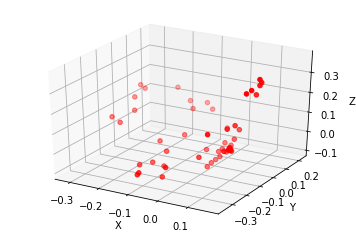

In [74]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =alphas[:,0]
y =alphas[:,1]
z =alphas[:,2]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [31]:
v=v.reshape(-1, 1)


In [49]:
delta_w=np.zeros((12,34))

In [80]:
X_train=X_train/np.max(X_train,axis=0)

In [99]:
X_test=np.delete(X_test,1,1)

In [18]:
x=X_train[0]    

In [40]:
delta_w=np.dot(0.1*v,(x-np.dot(v.T,w)))

In [43]:
np.shape(delta_w)

(12, 34)

/home/hari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Accuracy = 55% (55/100) (classification)
Accuracy = 67% (67/100) (classification)
Accuracy = 58% (58/100) (classification)
Accuracy = 55% (55/100) (classification)
Accuracy = 56% (56/100) (classification)
Accuracy = 53% (53/100) (classification)
Accuracy = 53% (53/100) (classification)
Accuracy = 62% (62/100) (classification)
Accuracy = 65% (65/100) (classification)
Accuracy = 64% (64/100) (classification)
Accuracy = 65% (65/100) (classification)
Accuracy = 58% (58/100) (classification)
Accuracy = 61% (61/100) (classification)
Accuracy = 67% (67/100) (classification)
Accuracy = 58% (58/100) (classification)
Accuracy = 60% (60/100) (classification)
Accuracy = 60% (60/100) (classification)
Accuracy = 68% (68/100) (classification)
Accuracy = 59% (59/100) (classification)
Accuracy = 59% (59/100) (classification)
Accuracy = 64% (64/100) (classification)
Accuracy = 62% (62/100) (classification)
Accuracy = 63% (63/100) (classification)
Accuracy = 61% (61/100) (classification)
Accuracy = 65% (

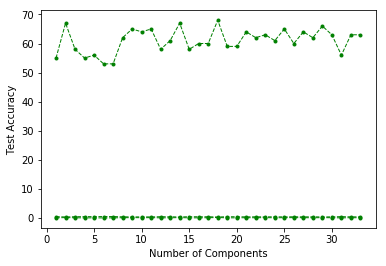

In [134]:
import numpy as np
from svmutil import *
import matplotlib.pyplot as plt
param = svm_parameter()
param.kernel_type = LINEAR
param.C = 10
import pandas
data = pandas.read_csv(r'ionosphere.data').as_matrix()
X_train=data[:100,:34]
X_test=data[100:200,:34]
Y_train=np.zeros(350)
for i in range(350):
    if data[i][34]=='b':
        Y_train[i]=int(0)
    else:
        Y_train[i]=int(1)
Y_test=Y_train[100:200]
Y_train=Y_train[:100]
X_test=np.delete(X_test,1,1)
X_train=np.delete(X_train,1,1)
X_train=X_train/np.max(X_train,axis=0)
X_test=X_test/np.max(X_train,axis=0)
accuracy=[]
variance_capture=[]
num_components=[]
for i in range(33):
    i=i+1
    num_components.append(i)
    w=.01*np.random.rand(i,33)
    delta_w=np.zeros((i,33))
    for x in X_train:
        v=np.dot(w,x.T)
        v=v.reshape(-1, 1)
        #print(np.sum(np.dot(v.T,w)))
        delta_w=np.dot(.11*v,(x-np.dot(v.T,w)))
        #print(np.sum(x-np.dot(v.T,w)))
        w=w-delta_w
    X_final=np.dot(X_train,w.T)
    prob = svm_problem(Y_train, X_final)
    m=svm_train(prob, param)
    X_testf=np.dot(X_test,w.T)
    p_labels, p_acc, p_vals = svm_predict(Y_test, X_testf, m)
    accuracy.append(p_acc)
plt.plot(num_components, accuracy,color='green', marker='o', linestyle='dashed',linewidth=1, markersize=3)
plt.xlabel('Number of Components')
plt.ylabel('Test Accuracy')
plt.show()

In [71]:
np.shape(w)

(12, 34)

In [133]:
import numpy as np
from svmutil import *
import matplotlib.pyplot as plt
param = svm_parameter()
param.kernel_type = LINEAR
param.C = 10
import pandas
data = pandas.read_csv(r'ionosphere.data').as_matrix()
X_train=data[:100,:34]
X_test=data[100:200,:34]
Y_train=np.zeros(350)
for i in range(350):
    if data[i][34]=='b':
        Y_train[i]=int(0)
    else:
        Y_train[i]=int(1)
Y_test=Y_train[100:200]
Y_train=Y_train[:100]
X_test=np.delete(X_test,1,1)
X_train=np.delete(X_train,1,1)
X_train=X_train/np.max(X_train,axis=0)
X_test=X_test/np.max(X_train,axis=0)

/home/hari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [119]:
w=.1*np.random.rand(12,33)
delta_w=np.zeros((12,33))

In [116]:
v=np.dot(w,x.T)

v=v.reshape(-1, 1)

In [109]:
X_train=X_train.astype(int)
X_train=X_train-np.mean(X_train,axis=0)

In [121]:
np.shape(x)

(33,)

In [120]:
np.shape(w)

(12, 33)

In [112]:
for x in X_train:
    v=np.dot(w,x.T)
    v=v.reshape(-1, 1)
    delta_w=np.dot(.11*v,(x-np.dot(v.T,w)))
    w=w-delta_w

In [113]:
np.sum(w)

nan

In [98]:
y=X_train[0]-np.dot(v.T,w)

In [99]:
np.shape(v)

(12, 1)

In [100]:
np.shape(y)

(1, 33)

In [102]:
dw=np.dot(.1*v,y)

In [103]:
w=w-dw

In [95]:
prob = svm_problem(Y_train, X_final)

In [96]:
m=svm_train(prob, param)

In [97]:
p_labels, p_acc, p_vals = svm_predict(Y_train, X_final, m)

Accuracy = 60% (60/100) (classification)


In [100]:
X_test=np.dot(X_test,w.T)

In [101]:
p_labels, p_acc, p_vals = svm_predict(Y_test, X_test, m)

Accuracy = 63% (63/100) (classification)


In [2]:
import pandas

In [3]:
data = pandas.read_csv(r'ionosphere.data').as_matrix()


/home/hari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
